# Série 3 : Datamining
# Exercice 2 :
Ce code représente la solution de l'exercice 2 de la série 3.

Dans la première partie, le but est de concrétiser la régression linéaire via la méthode de la descente du gradient (Gradient descente).

Dans la deuxième partie, on attaque la régression linéaire en utilisant la méthode analytique (les moindres carrés).


A la fin, une comparaison quantitative et qualitative est illustré afin de montrer les avantages et les inconvénients de chacune des deux stratégies.

# Lien de code sur Github
<img src="qrcode.png" width="450">

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Préparation des données

In [2]:
X = [2,3,5,9,10,12,15]
Y = [23,27,28,39,39,45,51]

In [3]:
X = np.array(X)
Y = np.array(Y)

In [4]:
print ("{:<15} | {:<15} |".format('Nbr Visites (X)','Commandes (Y)'))
for i in range(len(X)):
    
    print ("{:<15} | {:<15} |".format(X[i], Y[i]))

Nbr Visites (X) | Commandes (Y)   |
2               | 23              |
3               | 27              |
5               | 28              |
9               | 39              |
10              | 39              |
12              | 45              |
15              | 51              |


## Visualisation des données
Représentation d'un nuage de points des données

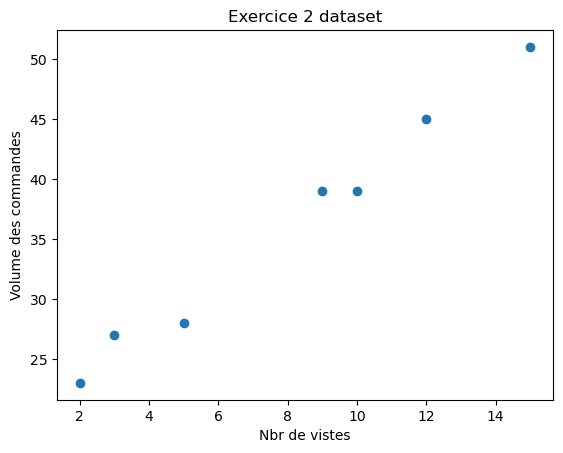

In [5]:
plt.scatter(X,Y)
plt.xlabel('Nbr de vistes')
plt.ylabel('Volume des commandes')
plt.title('Exercice 2 dataset')
plt.show()

# Définition des hyperparamtres 

In [6]:
#taux_apprentissage 
#alpha= 0.001
alpha = 0.01/2 #0.001
initial_theta_0 = np.random.rand()
initial_theta_1 = np.random.rand()
num_iterations = 80

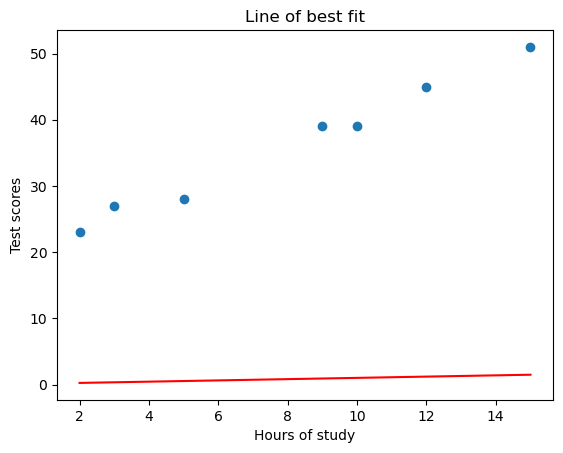

In [7]:
#Plot dataset
plt.scatter(X, Y)
#Predict y values
pred = initial_theta_1 * X + initial_theta_0
#Plot predictions as line of best fit
plt.plot(X, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

## Définition de la fonction Coût (Cost fonction)

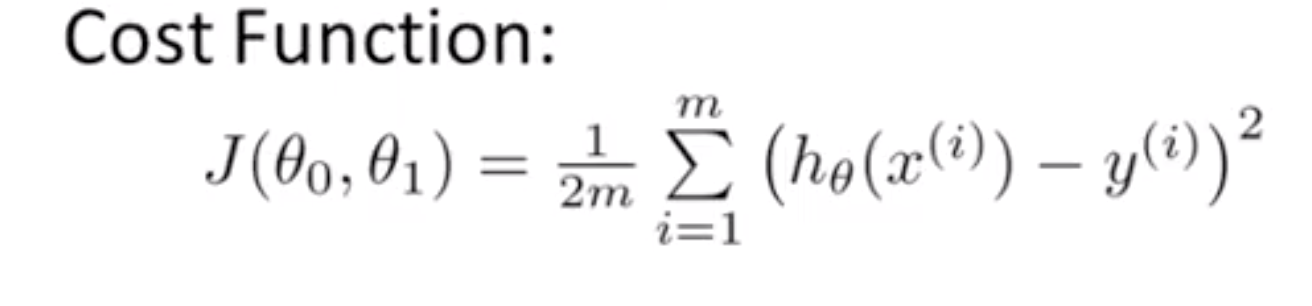

In [8]:
def fonction_cout(theta_0, theta_1, X,Y):
    total_cost = 0
    N = len(X)
    x= X
    y= Y
    #Compute sum of squtheta_1red errors
    for i in range(0, len(X)):
        x = X[i]
        y = Y[i]
        total_cost += (y - (theta_1 * x + theta_0)) ** 2
        
    #Return theta_1vertheta_1ge of squtheta_1red error
    return 2*total_cost/N

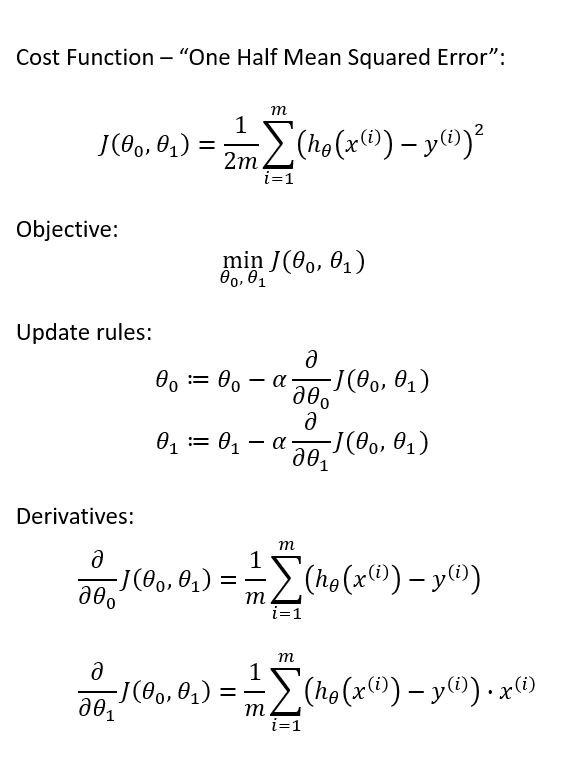

In [9]:
def iteration_gradient(theta_0_current, theta_1_current, X,Y, alpha):
    theta_1_gradient = 0
    theta_0_gradient = 0
    N = float(len(X))

    #Calculate Gradient
    for i in range(0, len(X)):
        x = X[i]
        y = Y[i]
        theta_1_gradient +=  (1/N) * x * ((theta_1_current * x + theta_0_current) - y )
        theta_0_gradient +=  (1/N) * ((theta_1_current * x + theta_0_current) - y)
    
    #Update current m and b
    theta_1_current = theta_1_current - alpha * theta_1_gradient
    theta_0_current = theta_0_current - alpha * theta_0_gradient

    #Return updated parameters
    return theta_0_current, theta_1_current

In [14]:
from tqdm import tqdm
def gradient_descent_runner(X,Y, theta_0_depart, theta_1_depart, alpha, num_iterations):
    theta_0 = theta_0_depart
    theta_1 = theta_1_depart
    cost_graph = []
    
    #For every iteration, optimize b, m and compute its cost
    for i in tqdm(range(num_iterations), desc="Processing"):
        cost_graph.append(fonction_cout(theta_0, theta_1, X,Y))
        theta_0, theta_1 = iteration_gradient(theta_0, theta_1, X,Y, alpha)

    return [theta_0, theta_1, cost_graph]

In [15]:
initial_theta_0

0.07935596042509685

In [16]:
initial_theta_0 = np.random.rand()
initial_theta_1 = np.random.rand()
print(initial_theta_0,initial_theta_1)

0.887058274189219 0.47880542806352633


In [17]:
theta_0, theta_1, cost_graph = gradient_descent_runner(X,Y, 0, 0, 0.01/2, 80)

#Print optimized parameters
print ('Optimized theta 0:', theta_0)
print ('Optimized theta 1:', theta_1)

#Print error with optimized parameters
print ('Minimized cost:', fonction_cout(theta_0, theta_1, X,Y))

Processing: 100%|███████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 10000.13it/s]

Optimized theta 0: 2.0539158559030555
Optimized theta 1: 3.742616218075113
Minimized cost: 139.47984589195457


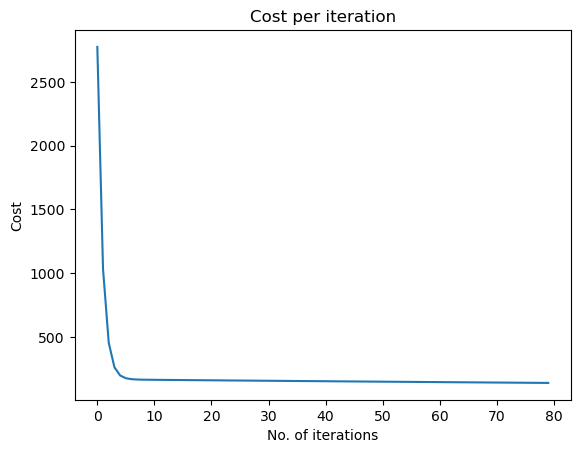

In [18]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

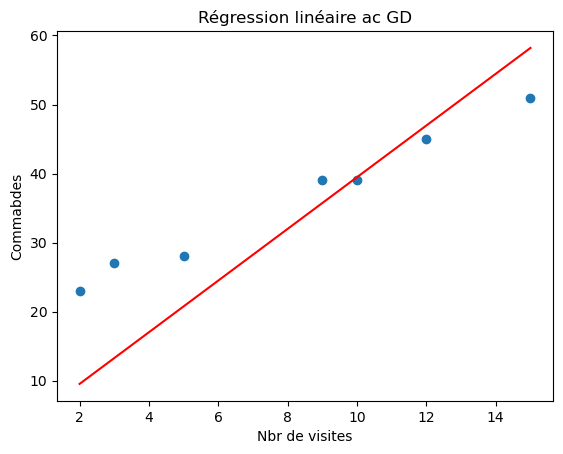

In [19]:
#Plot dataset
plt.scatter(X, Y)
#Predict y values
pred = theta_1 * X + theta_0
#Plot predictions as line of best fit
plt.plot(X, pred, c='r')
plt.xlabel('Nbr de visites')
plt.ylabel('Commabdes')
plt.title('Régression linéaire ac GD')
plt.show()

In [20]:
a,b

NameError: name 'a' is not defined

## Méthode des moindres carrées

In [23]:
#!pip install statistics

In [24]:
#from statistics import covariance,variance

comparer la fonction coût

In [164]:
print("fonction cout avec les moindres carrés",fonction_cout(b1,a1,X,Y))

fonction cout avec les moindres carrés 1.1525789900081016


In [243]:
print("fonction cout avec la descente du Gradient",fonction_cout(b,a,X,Y))

fonction cout avec la descente du Gradient 9.554975500827643


In [244]:
# Comparer le temps d'exécution

## Moindres carrés : formules plus simples

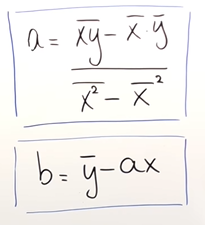

In [25]:
theta_1_second = ((X*Y).mean() - (X.mean() * Y.mean())) / ((X*X).mean() - X.mean()* X.mean())
theta_0_second = Y.mean() - theta_1_second * X.mean()

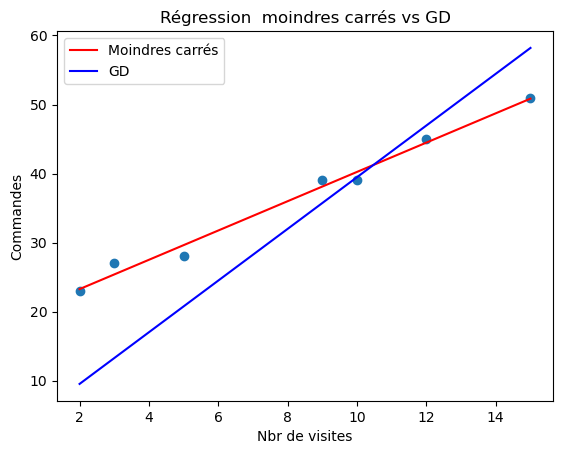

In [34]:
#Plot dataset
plt.scatter(X, Y)
#Predict y values
pred = theta_1_second * X + theta_0_second


#Plot predictions as line of best fit
plt.plot(X, pred, c='r',label="Moindres carrés")

plt.plot(X, theta_1 * X + theta_0, c='b',label="GD")

plt.xlabel('Nbr de visites')
plt.ylabel('Commandes')
plt.title('Régression  moindres carrés vs GD')
plt.legend(loc='best')

plt.show()

## Coefficinet de détermination

## La descente du gradient

In [32]:
R_2 = np.sum((Y -(theta_1 * X + theta_0))**2 )/ np.sum((Y -Y.mean())**2)
print("le Coefficient de détermination pour la méthod descente de gradient est ", 1-R_2)

le Coefficient de détermination pour la méthod descente de gradient est  0.23482843162720846


In [33]:
R_2 = np.sum((Y -pred)**2 )/ np.sum((Y -Y.mean())**2)
print("le Coefficient de détermination pour la méthode Moindres carrés est ", 1-R_2)

le Coefficient de détermination pour la méthode Moindres carrés est  0.9875615763546798


# Fin =)